#### Importing Relevant Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import librosa
import librosa.display

####  Loading Required Data

In [61]:
df = pd.read_csv("Metadata (1).csv",usecols=["Dataset File Name","Class ID","Class Name"]) 

In [63]:
df.tail()

Dataset File Name  Class ID Class Name
2020      27_12771.wav        27   Squirrel
2021      27_12772.wav        27   Squirrel
2022      27_12773.wav        27   Squirrel
2023      27_12774.wav        27   Squirrel
2024      27_12775.wav        27   Squirrel

In [65]:
df["Class ID"].value_counts() 

Class ID
1     75
15    75
26    75
25    75
24    75
23    75
22    75
21    75
20    75
19    75
18    75
17    75
16    75
14    75
2     75
13    75
12    75
11    75
10    75
9     75
8     75
7     75
6     75
5     75
4     75
3     75
27    75
Name: count, dtype: int64

- INFERENCE: 75 audio files in each class so the data is balanced.

#### Creating Dataframe for Analysis

In [69]:
# Specifying the directory containing audio files
audio_folder = r"C:\Users\kanis\Downloads\Audio Files"

# Listing all files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(('.wav'))]

# Creating an empty DataFrame to store file information
audio_data = pd.DataFrame(columns=['Dataset File Name', 'Audio_Array', 'Sample_Rate'])

# Looping through each file and loading the audio
for i, file in enumerate(audio_files):
    file_path = os.path.join(audio_folder, file)
    audio, sample_rate = librosa.load(file_path)
    audio_data.loc[i] = [file, audio, sample_rate]

audio_data.tail()

Dataset File Name                                        Audio_Array  \
2020       9_10971.wav  [0.053737853, 0.08550227, 0.07225977, 0.088562...   
2021       9_10972.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2022       9_10973.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2023       9_10974.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2024       9_10975.wav  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

      Sample_Rate  
2020        22050  
2021        22050  
2022        22050  
2023        22050  
2024        22050

In [70]:
audio_data["Sample_Rate"].value_counts() # sample rate is same  for all the audio files

Sample_Rate
22050    2025
Name: count, dtype: int64

- INFERENCE: Sample rate is same  for all the audio files.

#### Merging Datasets for a Better View

In [73]:
audio_data_merged = pd.merge(audio_data, df, on = "Dataset File Name" , how = "left")

#### Getting the Length of Audio Files

In [75]:
audio_data_merged["Length"] = audio_data_merged.apply(lambda row: len(row["Audio_Array"])/row["Sample_Rate"],axis=1)
audio_data_merged.head()

Dataset File Name                                        Audio_Array  \
0      10_11001.wav  [0.0006542611, 0.0014143534, 0.0010829747, 0.0...   
1      10_11002.wav  [-0.0011787486, -0.0016005734, -0.00046227998,...   
2      10_11003.wav  [-1.9994324e-05, -6.472127e-05, -3.9855455e-05...   
3      10_11004.wav  [1.0249132e-05, -7.768188e-05, -0.00013699285,...   
4      10_11005.wav  [5.181646e-05, 6.290134e-05, 6.199504e-05, 9.3...   

   Sample_Rate  Class ID Class Name  Length  
0        22050        10        Axe     5.0  
1        22050        10        Axe     5.0  
2        22050        10        Axe     5.0  
3        22050        10        Axe     5.0  
4        22050        10        Axe     5.0

In [76]:
audio_data_merged["Length"].value_counts()

Length
5.0    2025
Name: count, dtype: int64

- INFERENCE: Lenths of all the audio files are same across the dataset. 

#### Sorting Data 

In [79]:
df_sorted = audio_data_merged.sort_values(by=['Class ID'], ascending=True)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.index = df_sorted.index + 1

#### Looking into an Audio File from each Class

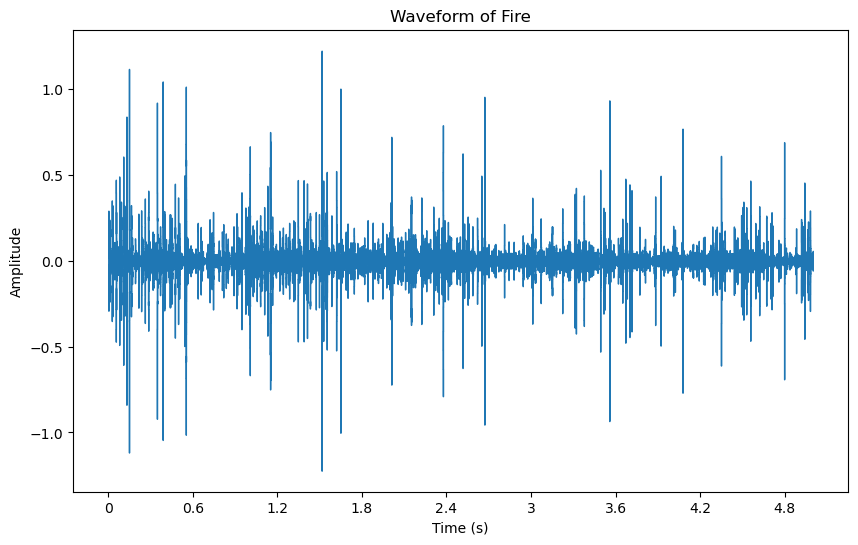

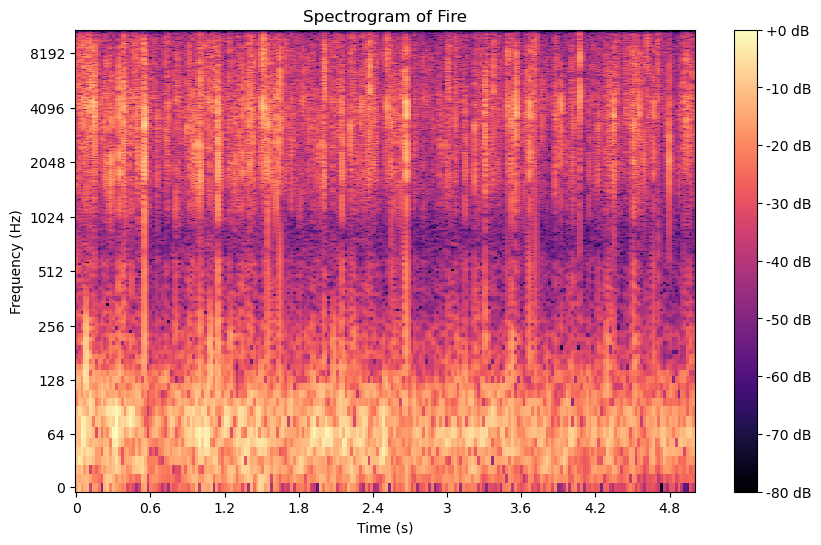

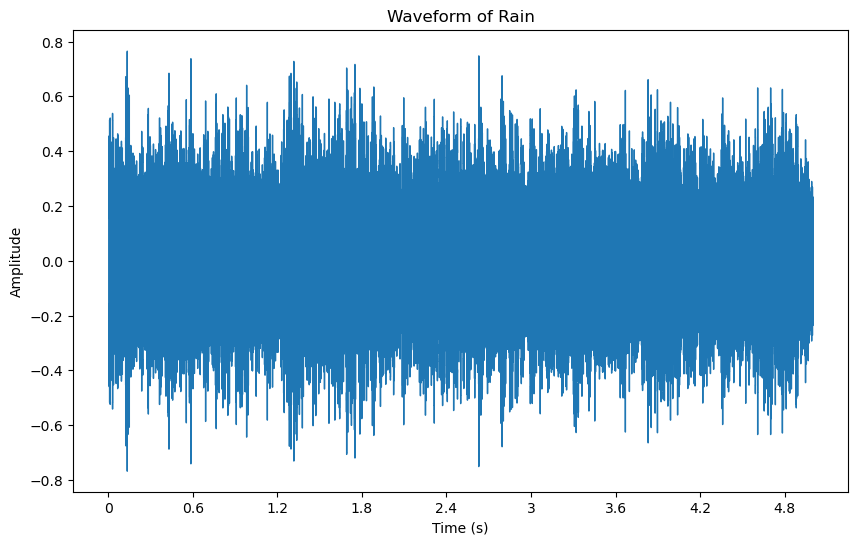

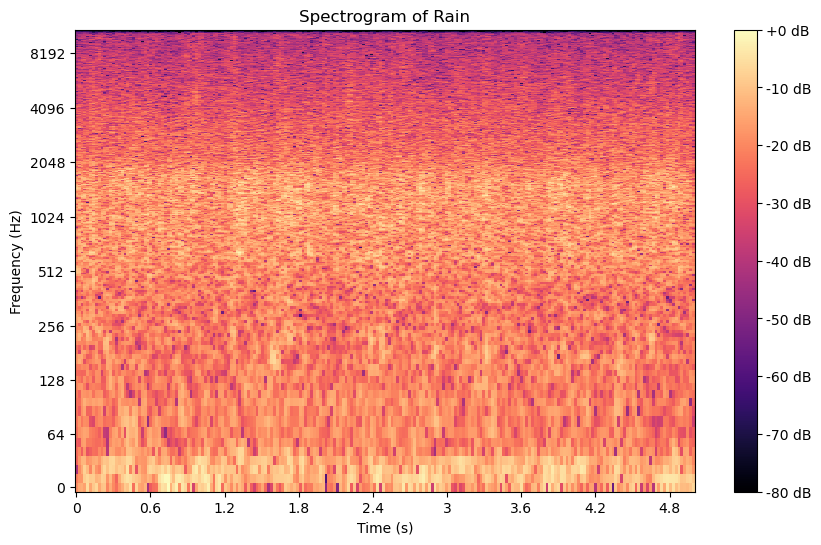

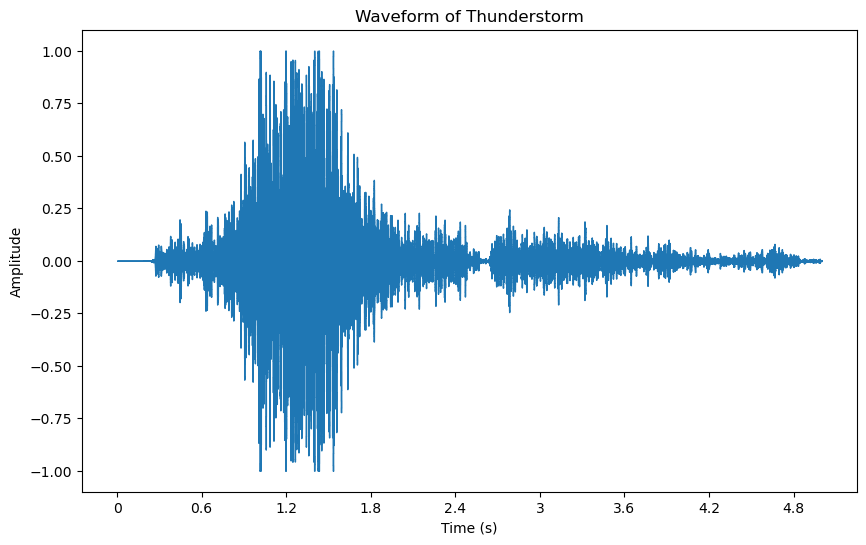

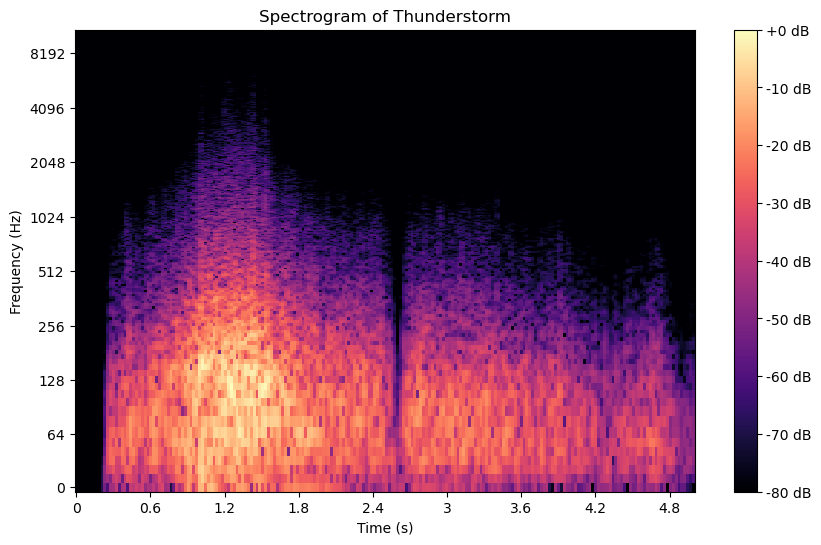

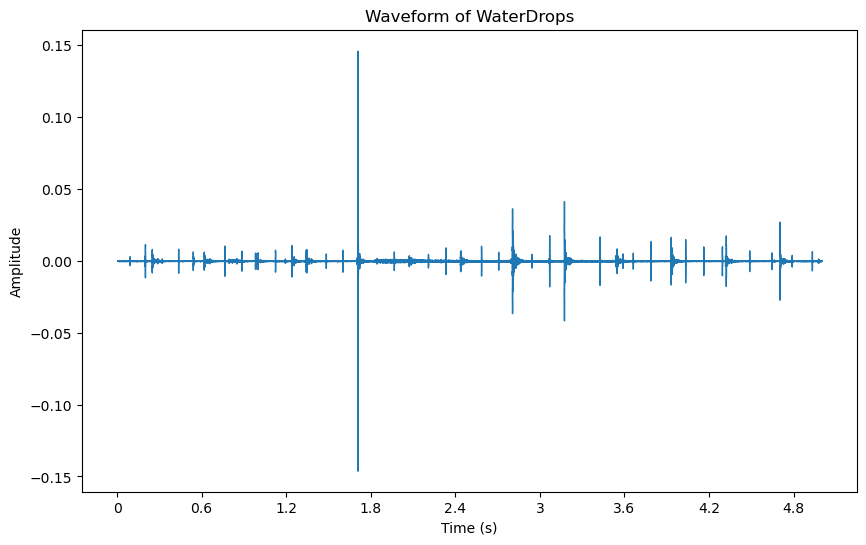

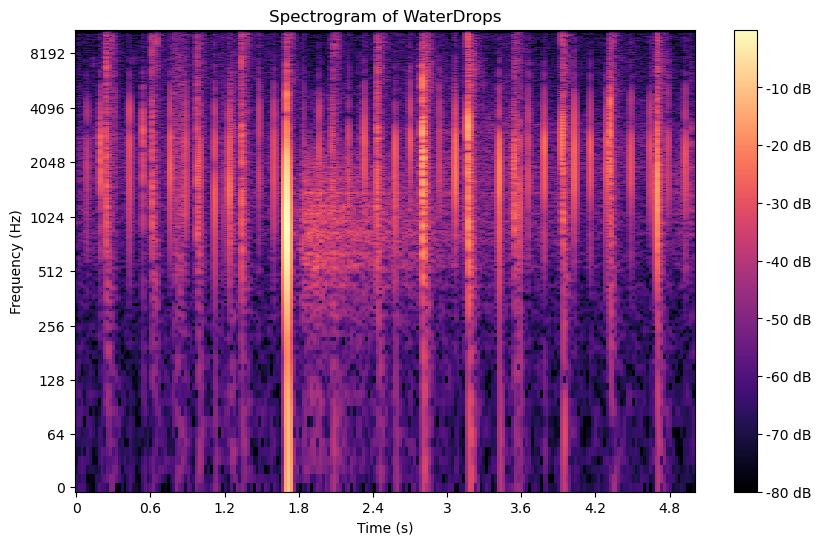

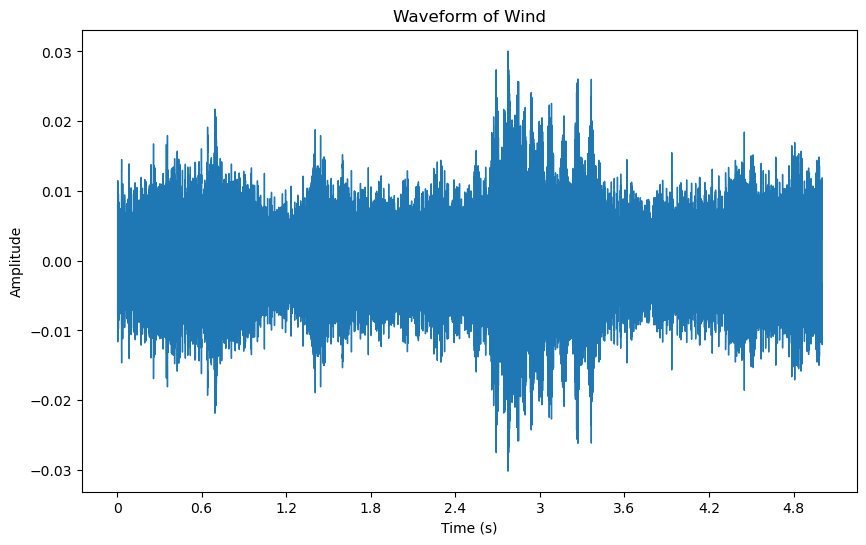

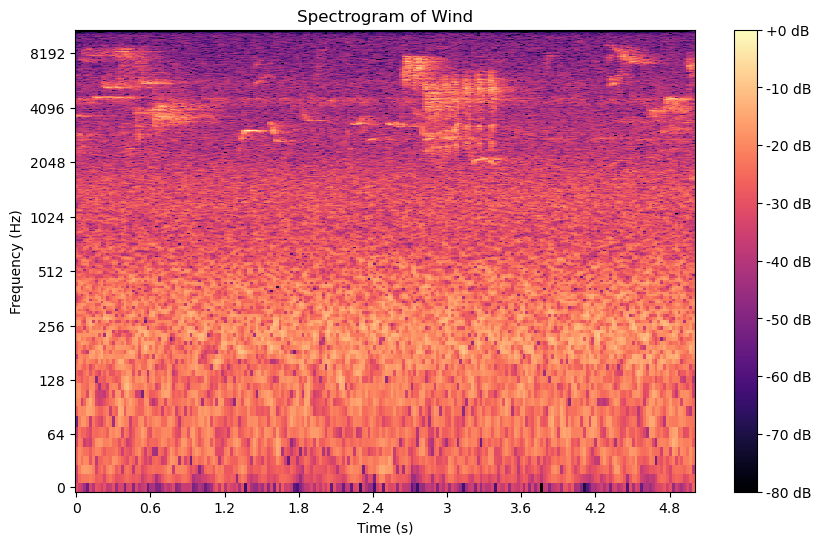

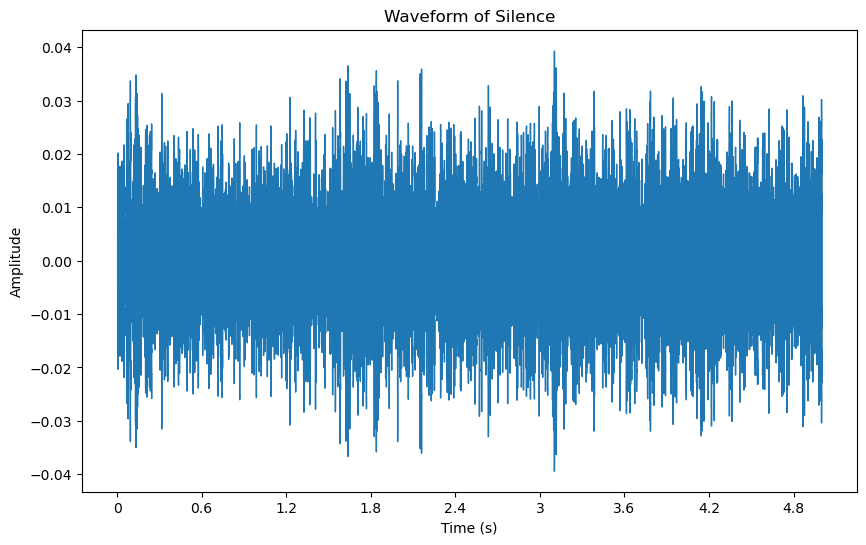

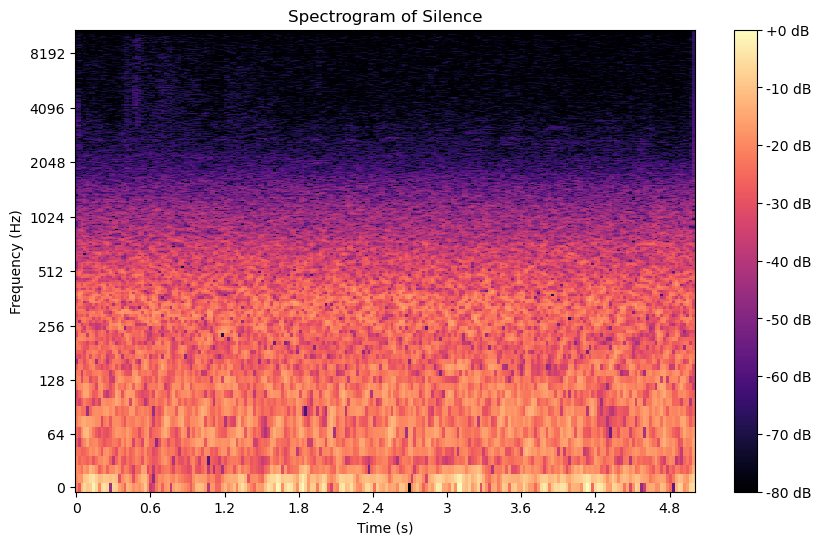

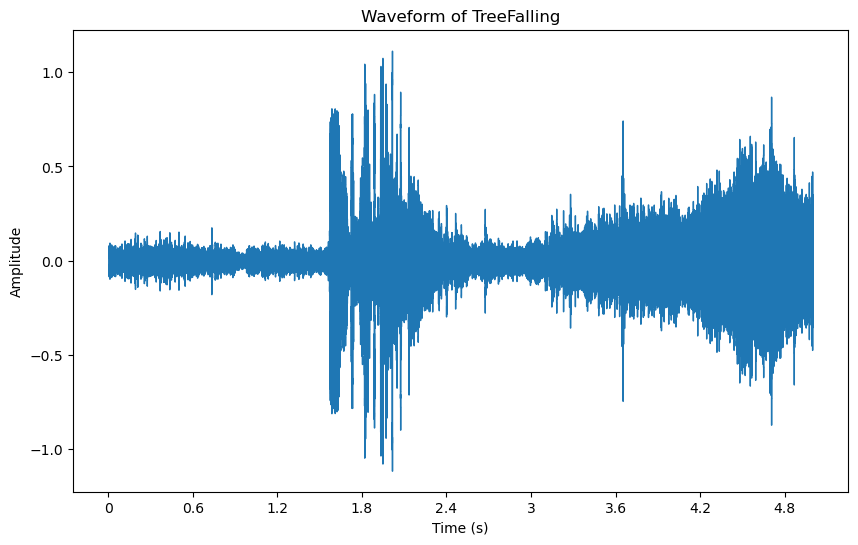

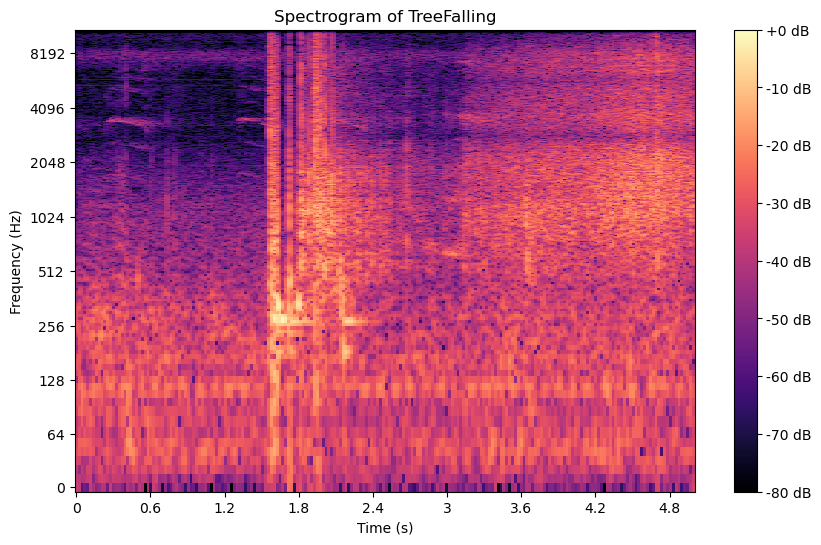

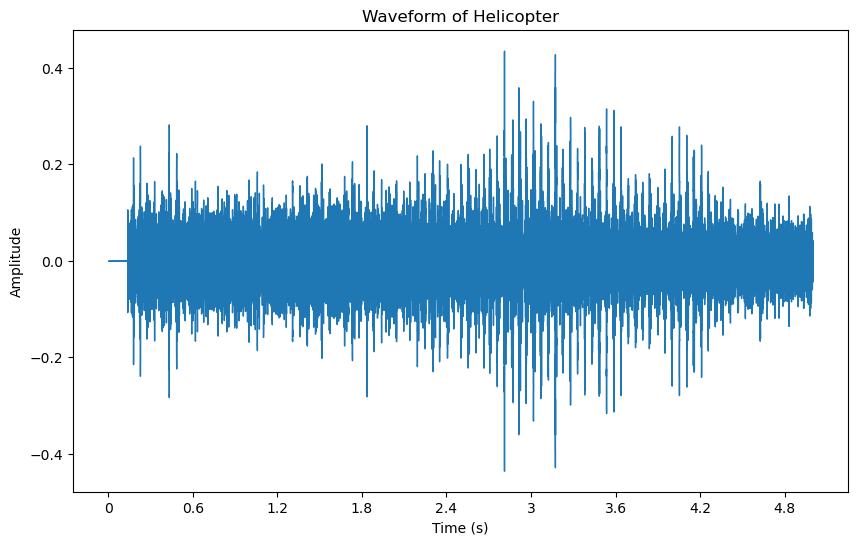

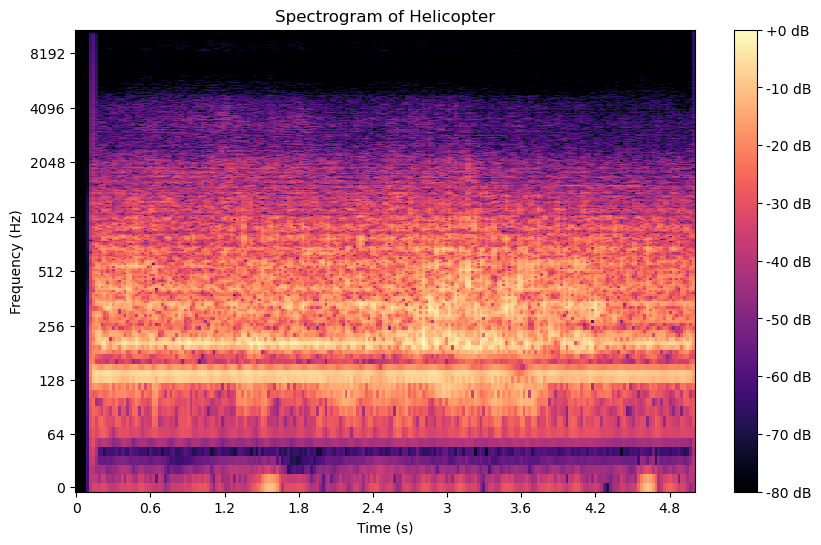

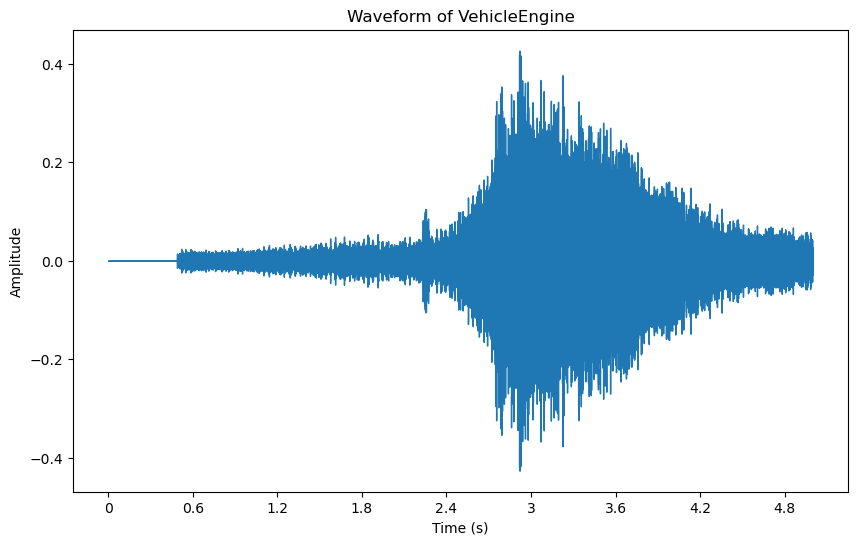

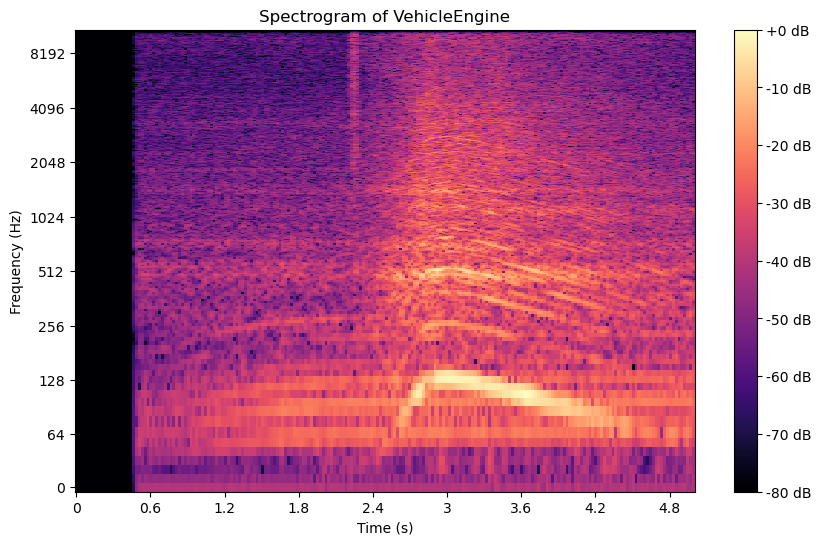

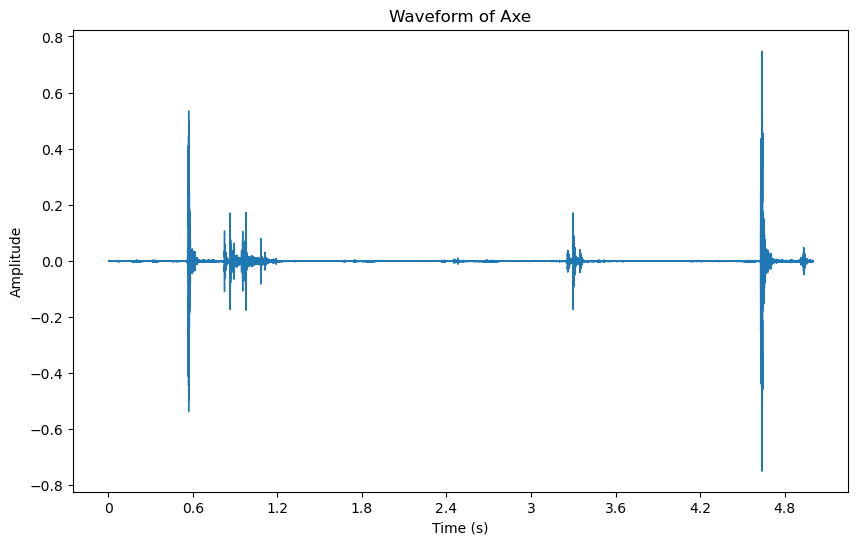

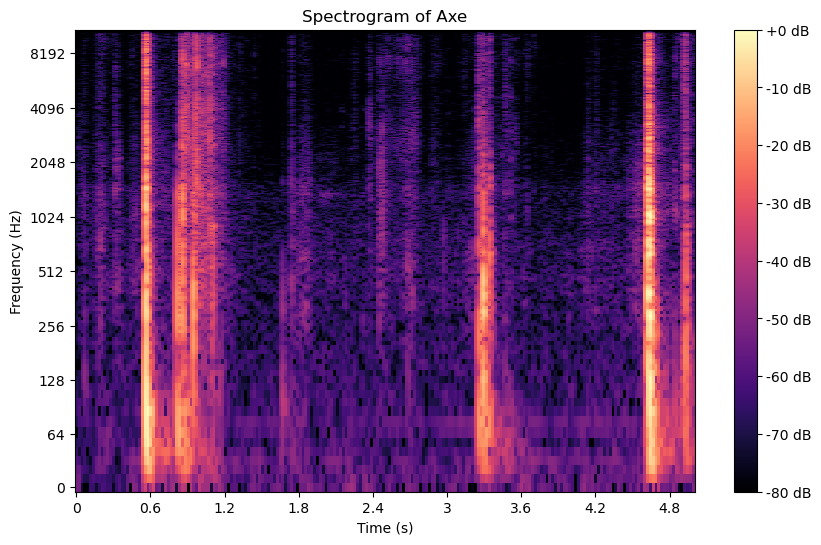

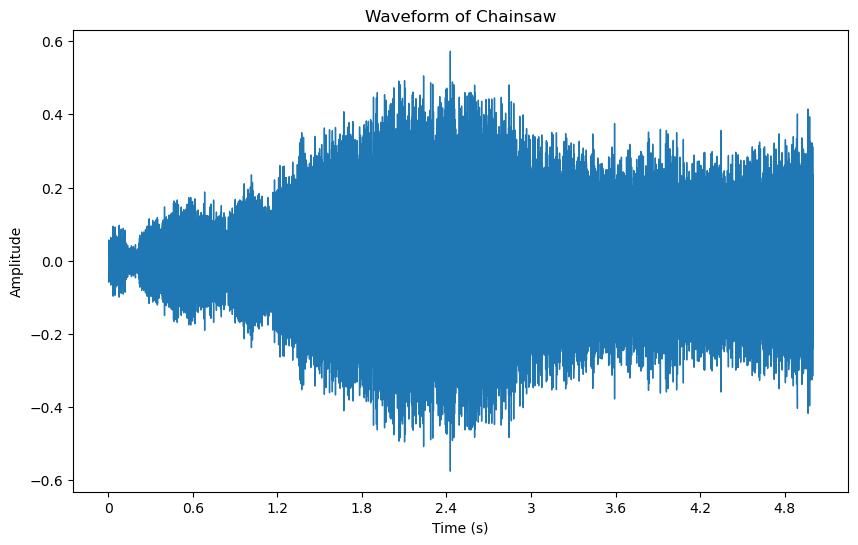

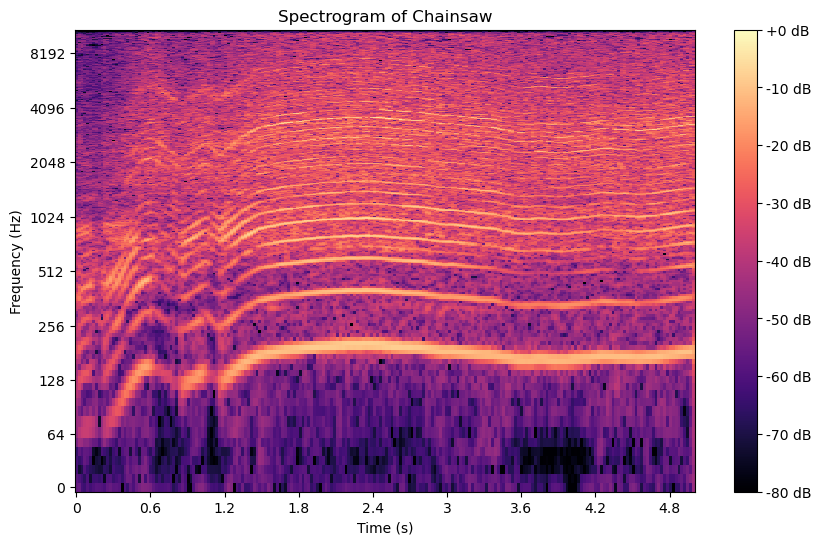

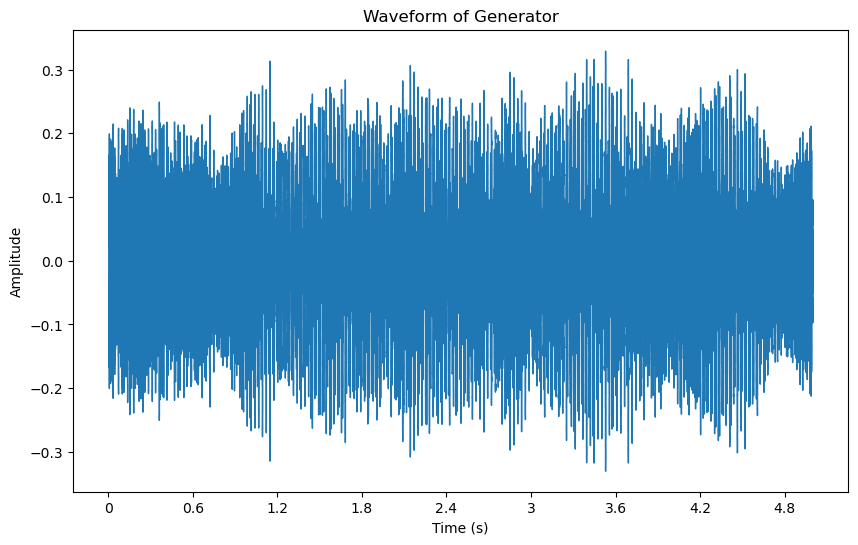

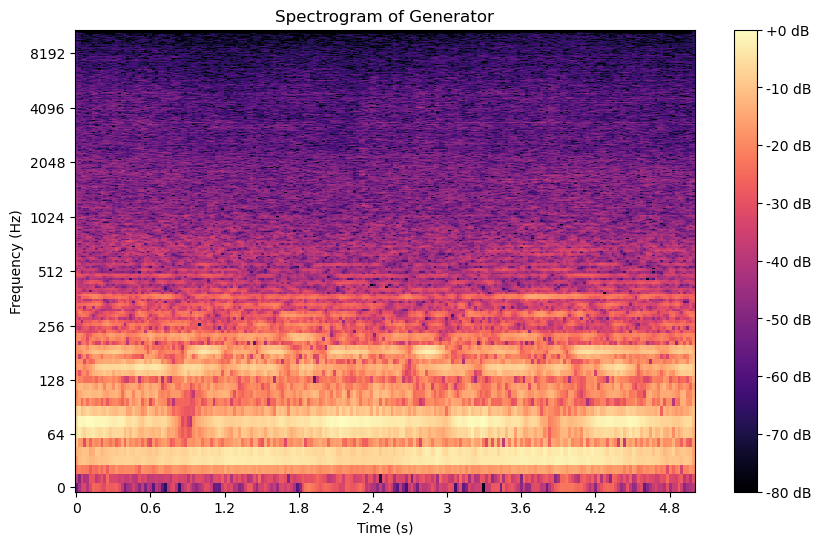

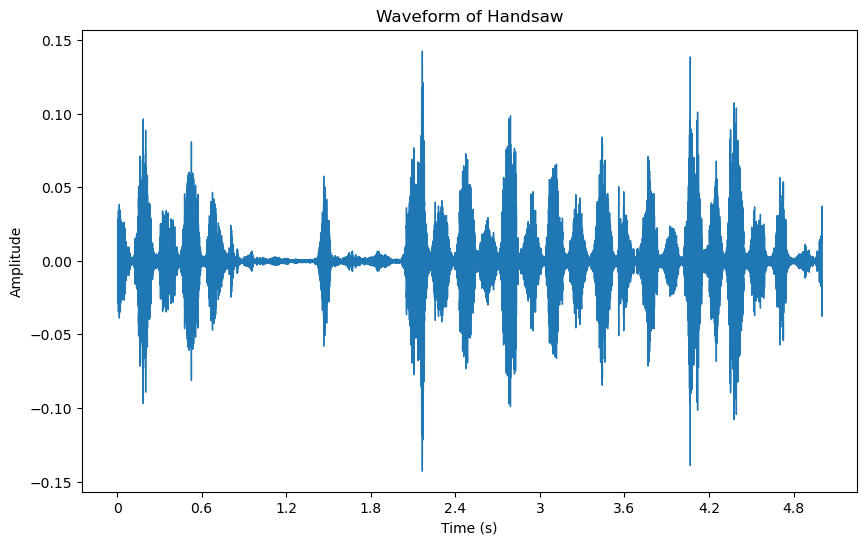

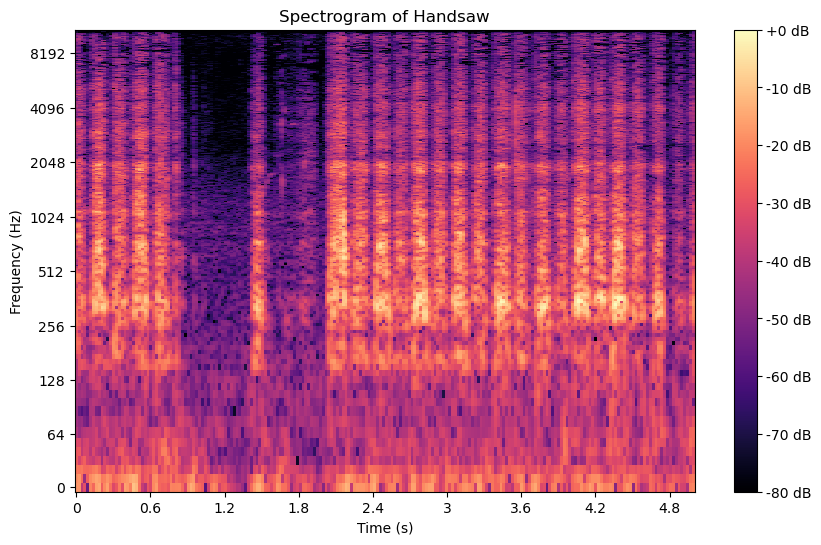

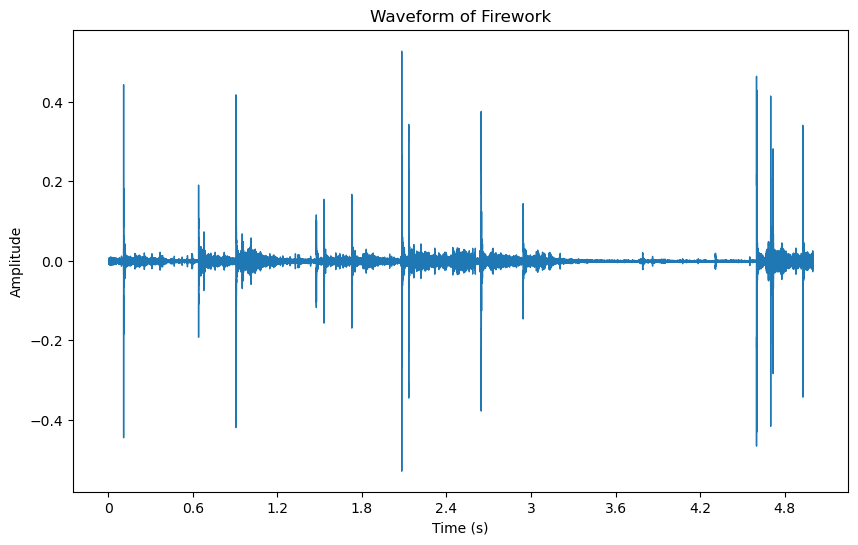

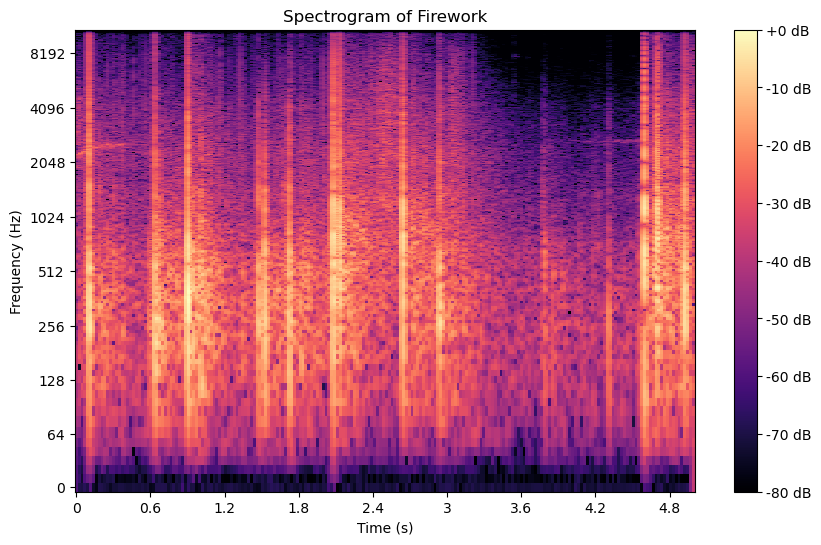

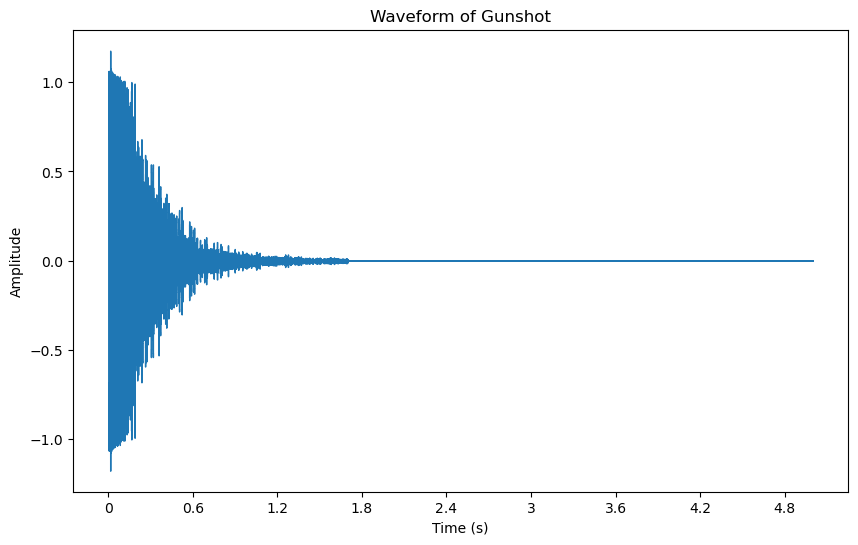

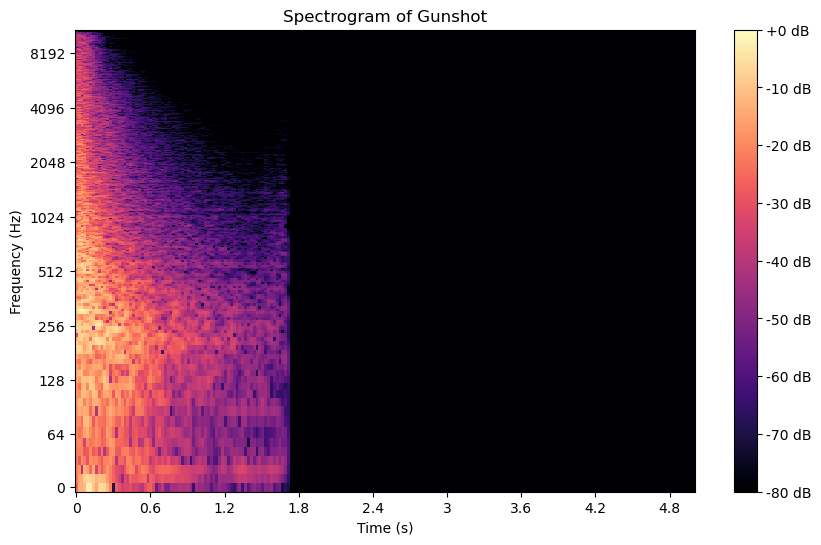

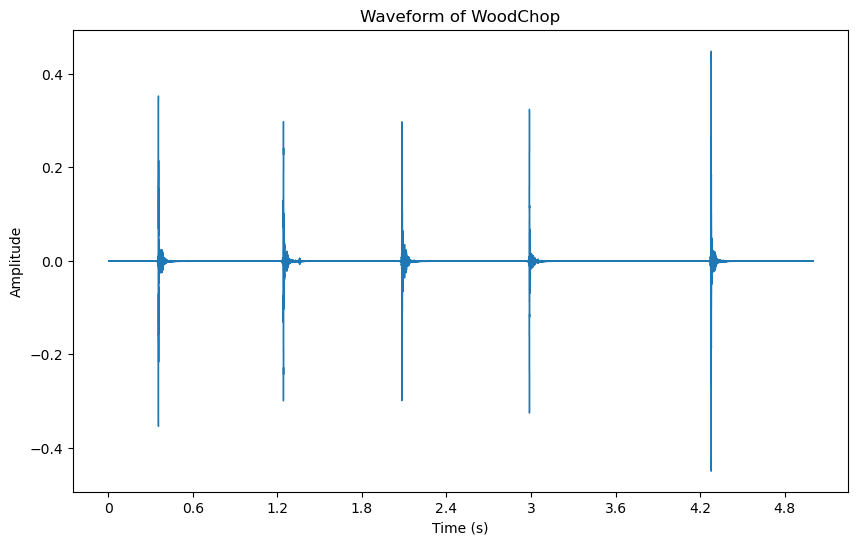

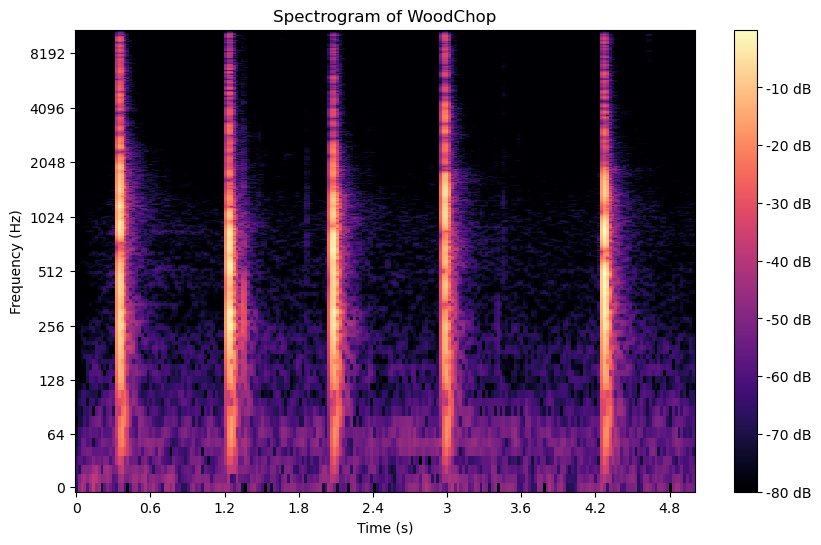

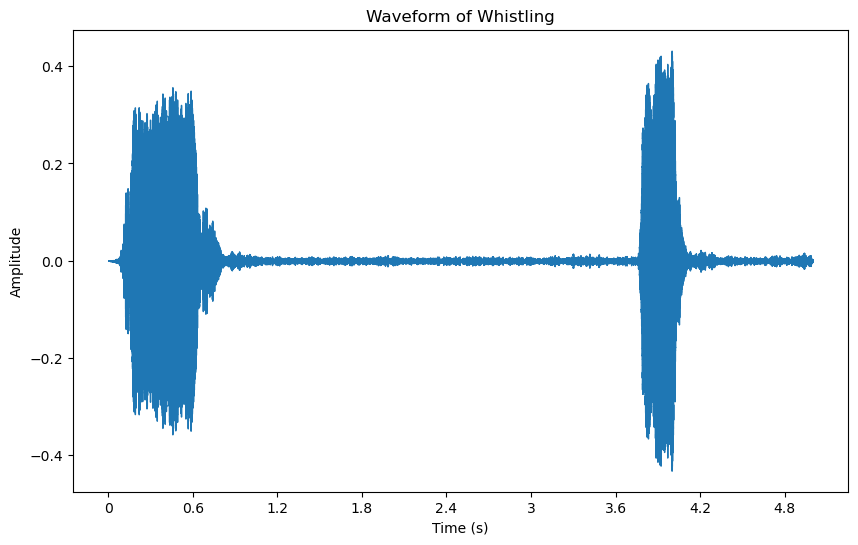

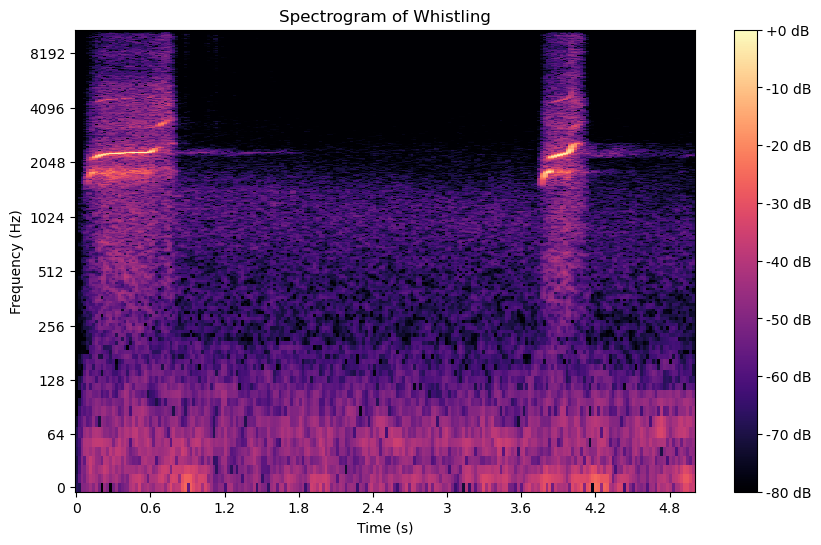

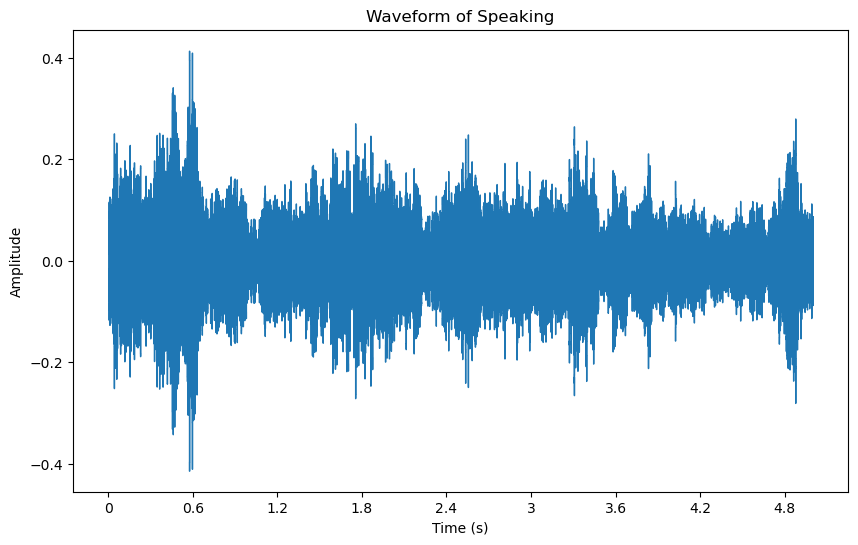

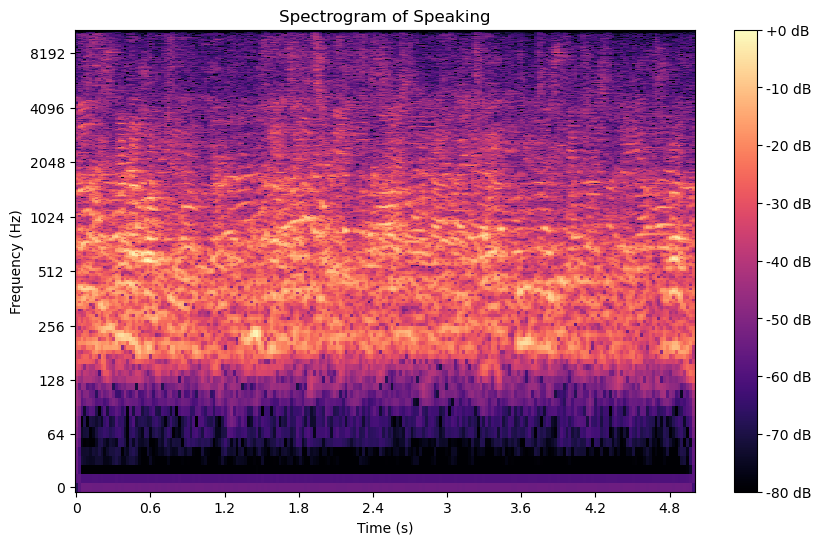

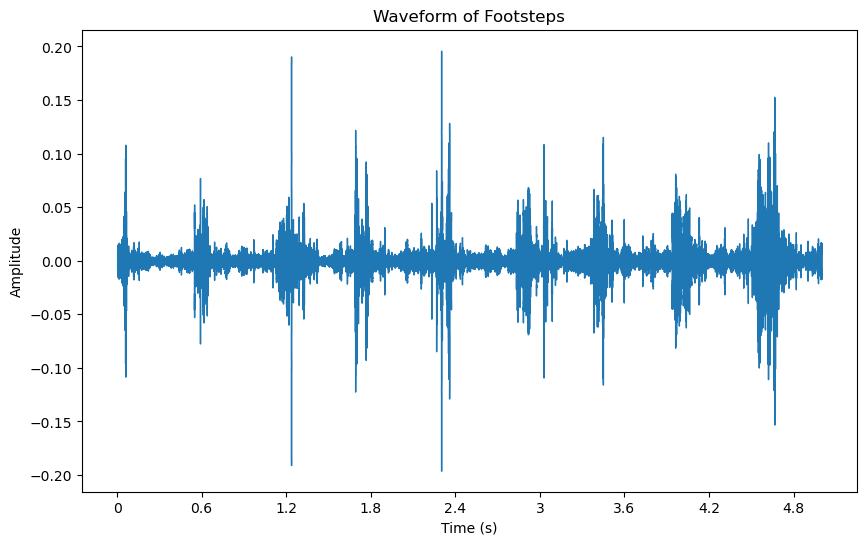

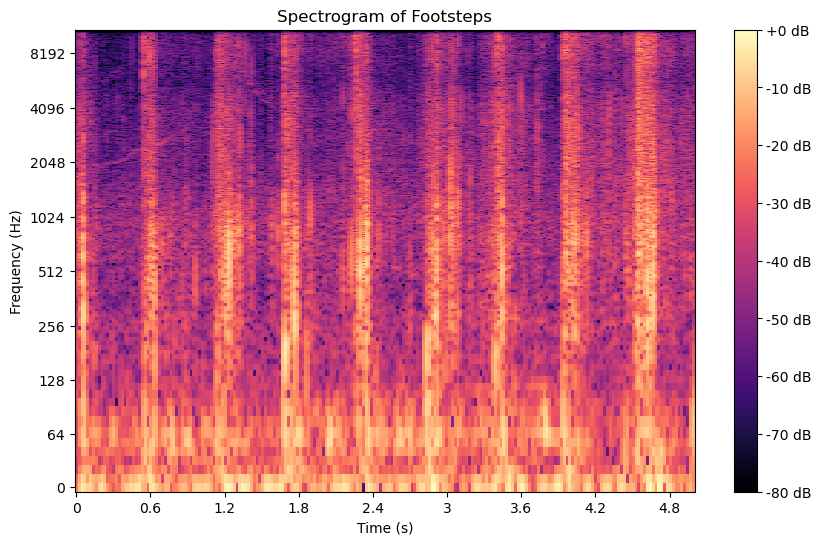

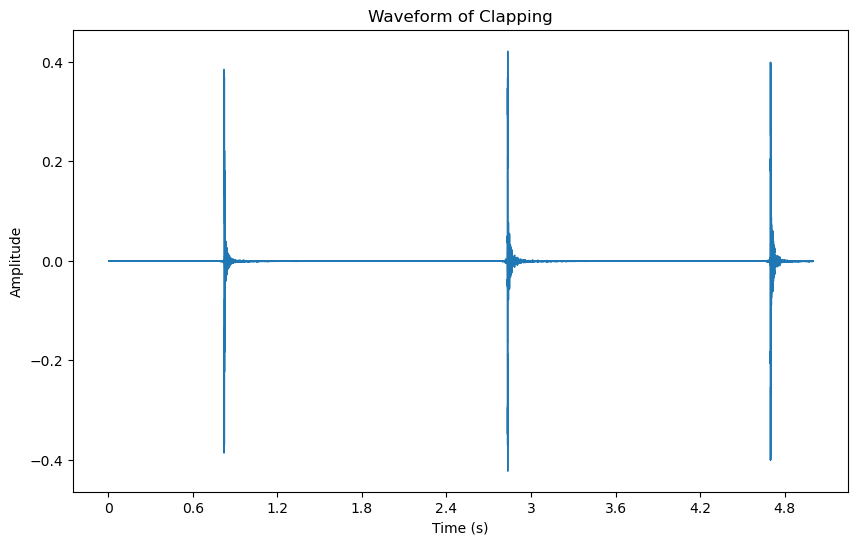

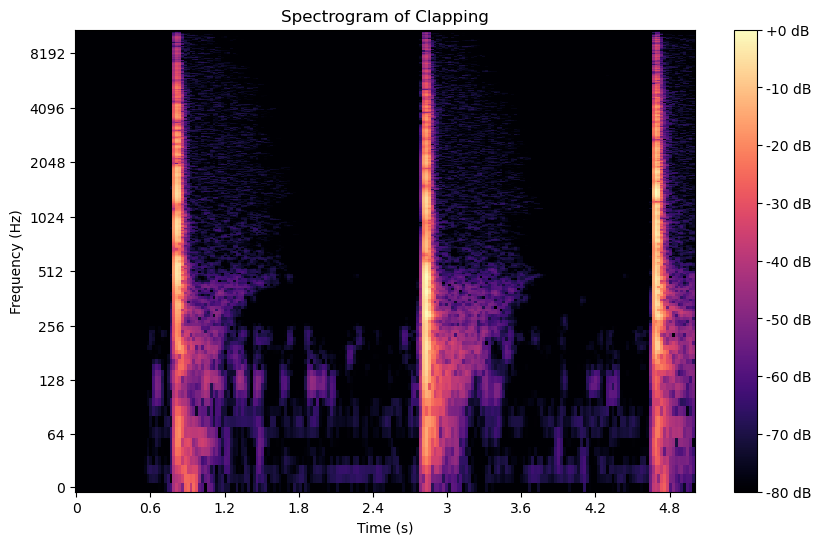

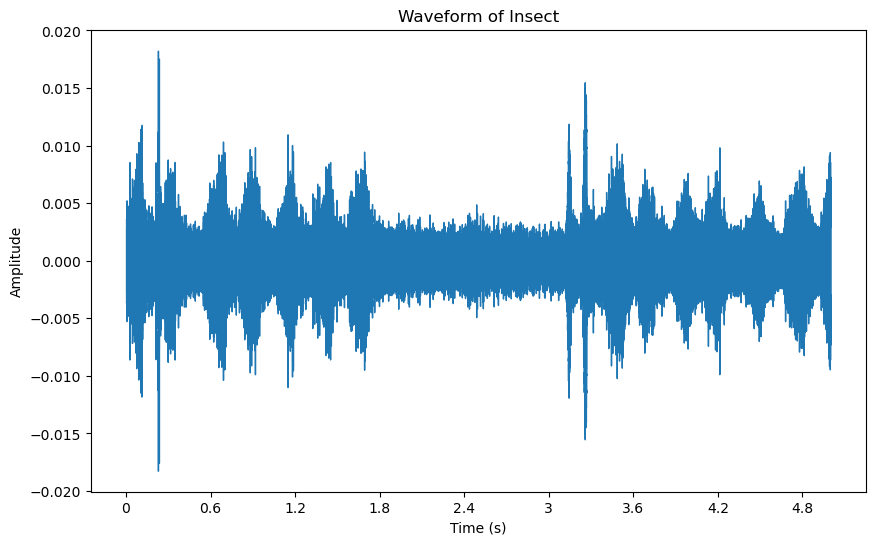

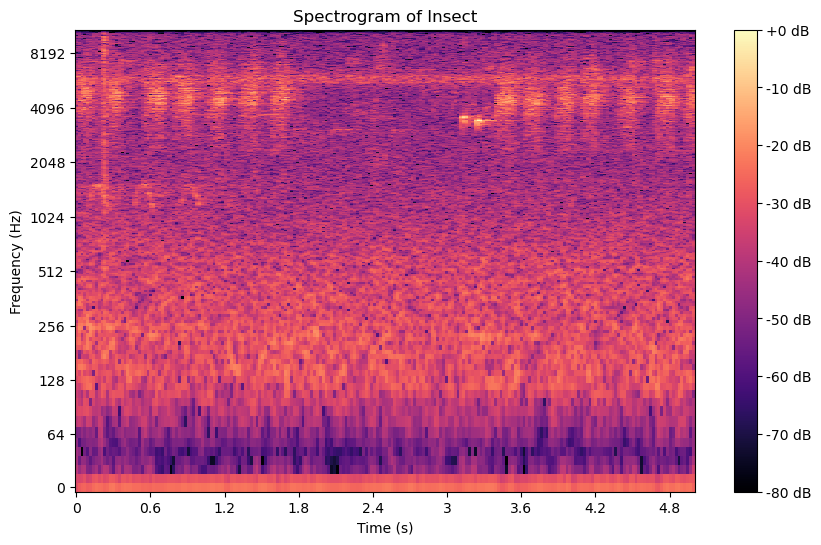

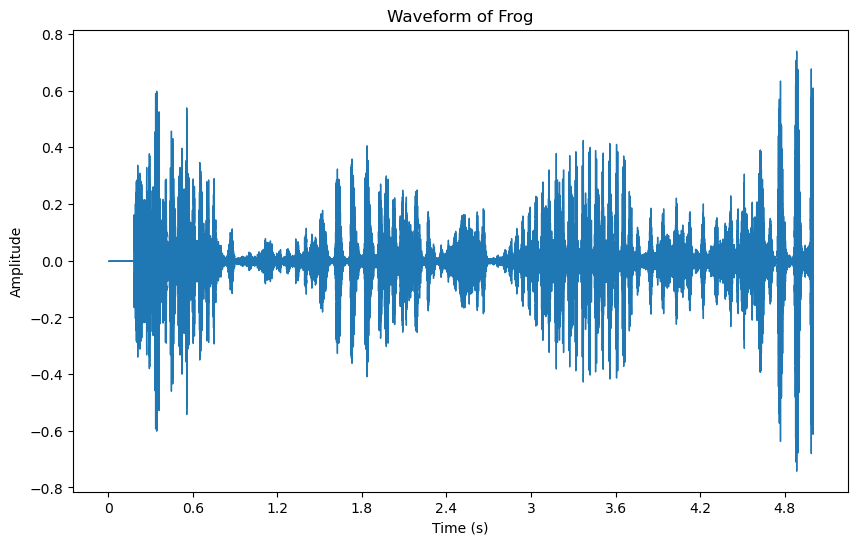

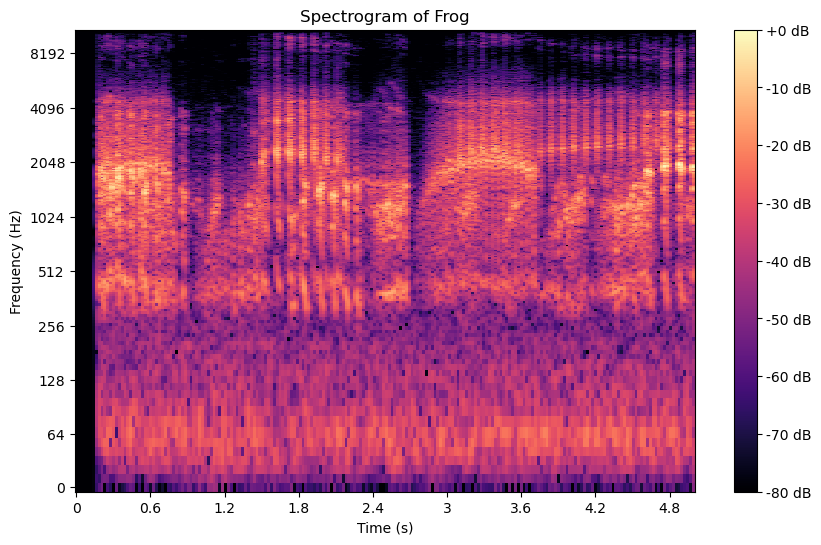

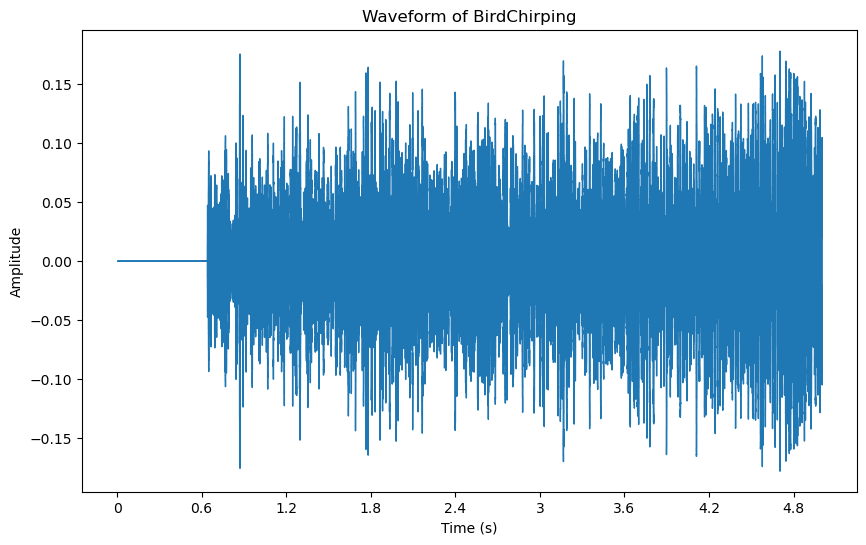

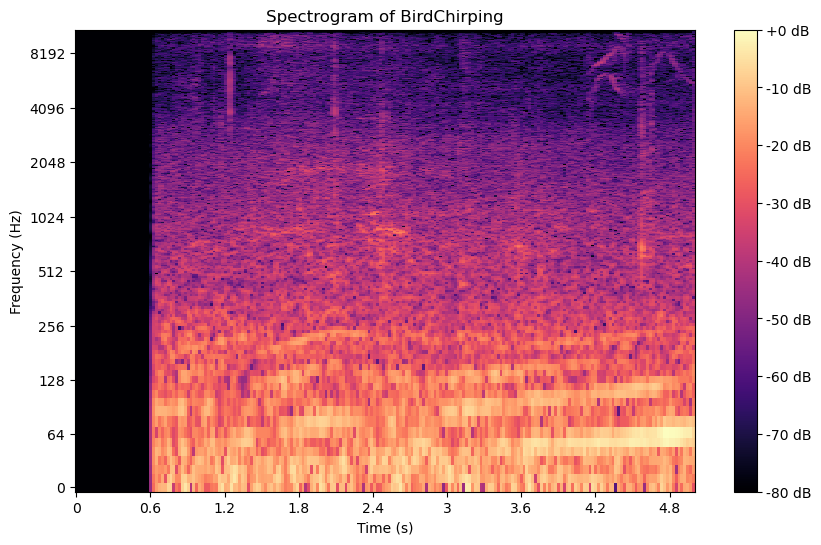

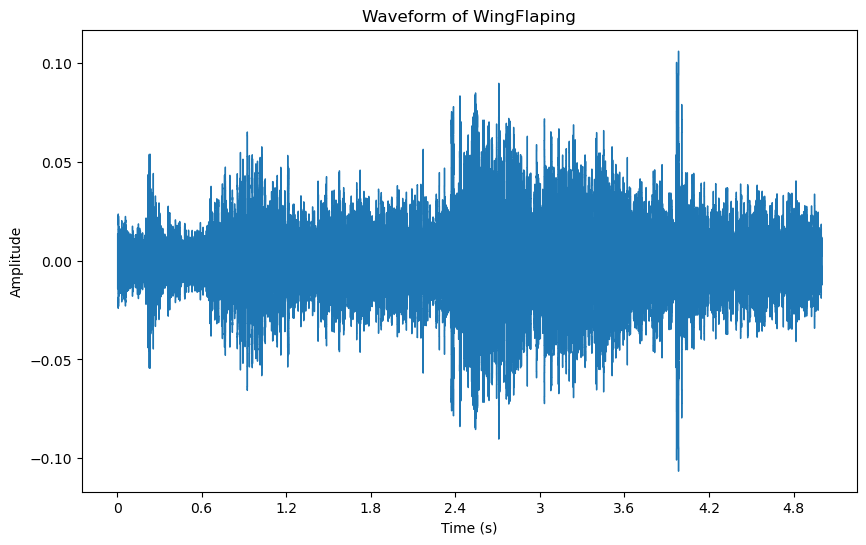

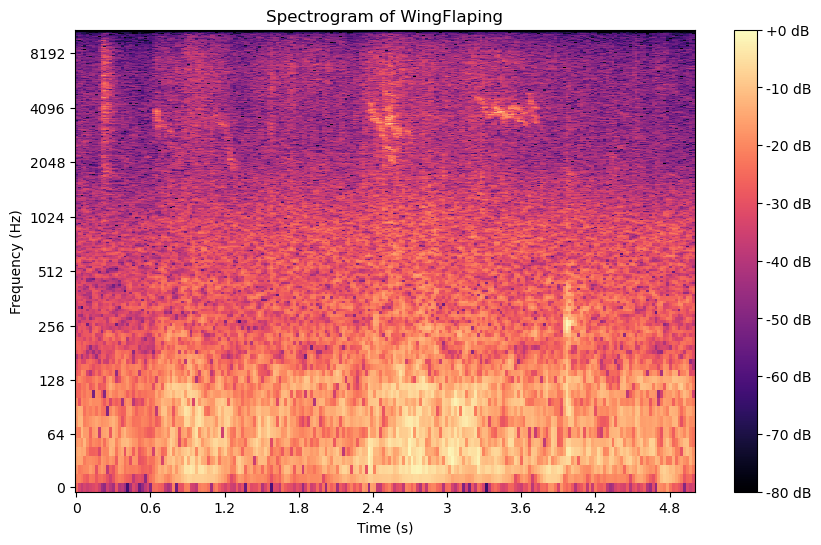

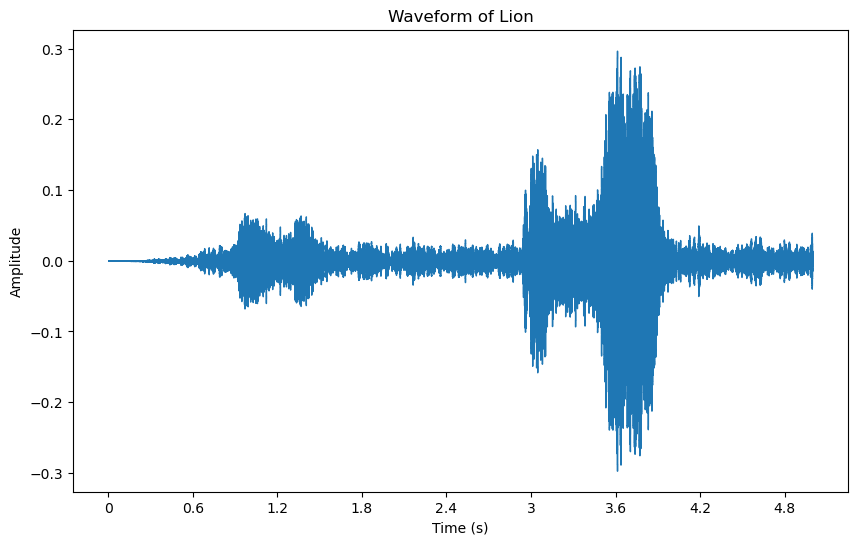

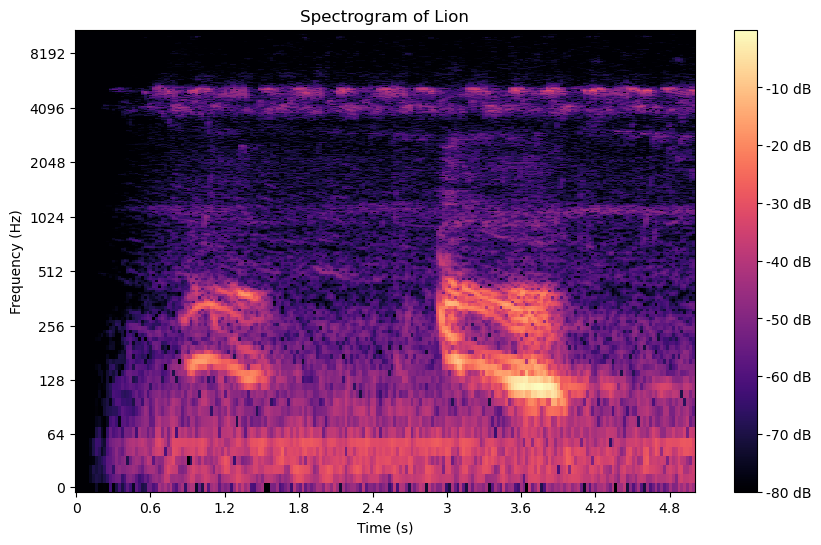

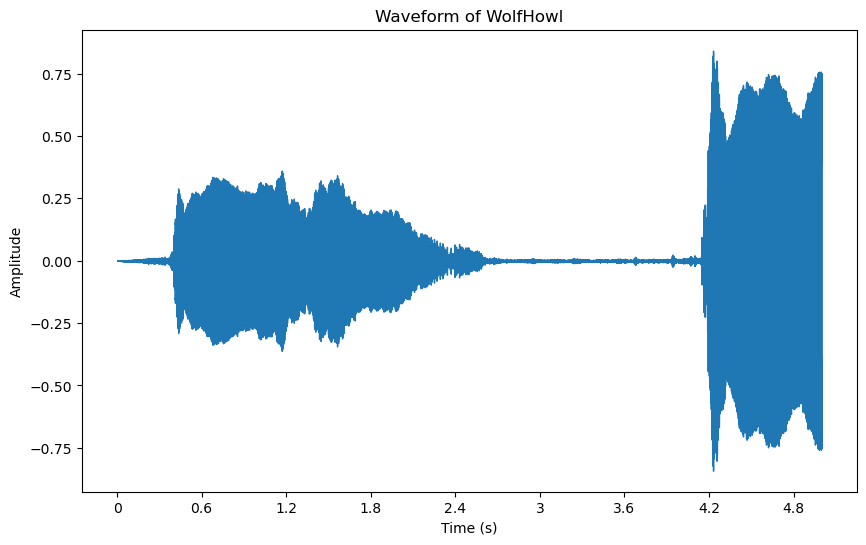

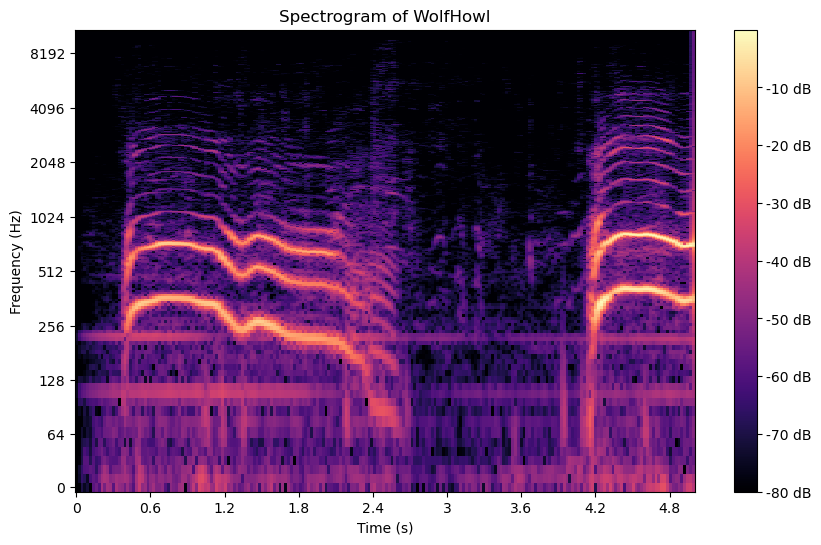

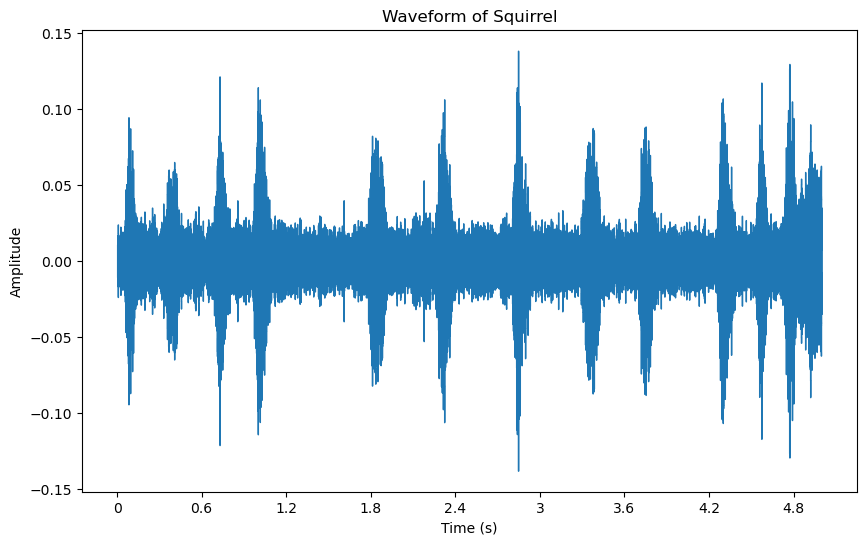

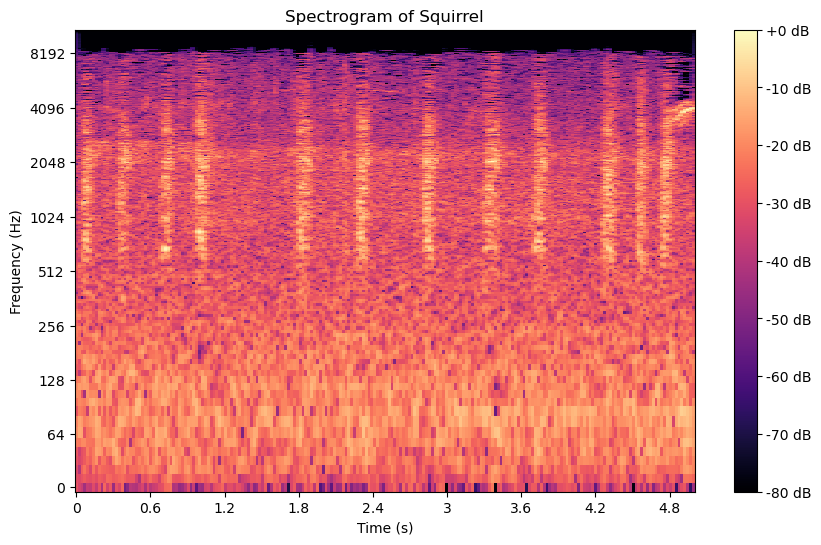

In [81]:
# Extracting one file from each class 
def process_audio(file):

                  
    audio_array = df_sorted.Audio_Array[file]
    
    # Plotting the waveform
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(audio_array, sr = 22050)
    plt.title(f"Waveform of {df_sorted["Class Name"][file]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Applying STFT
    D = librosa.stft(audio_array)

    # Converting amplitude to decibels for the spectrogram
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plottinng the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(D_db, sr = 22050 , x_axis='time', y_axis='log')
    plt.title(f"Spectrogram of {df_sorted["Class Name"][file]}")
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


for i in range(1,28):
    file = (i * 75)  # To pick the first file of each class, increment by 75
    process_audio(file)